In [1]:
import sys
sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders, hetero_distributed_cifar10_dataloaders
from training import train_PullSum, train_PullDiag, train_FRSD, train_FROZEN
from useful_functions import *
from new_network_func import *

In [4]:
n = 20
M = 2



I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
from network_func import di_ring
A,C=di_ring(n=20)
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


batch_size = 128*M

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root, seed=42
)

optimizer初始化成功!


Training Progress: 100%|██████████| 400/400 [1:10:01<00:00, 10.50s/it, epoch=400, test_accuracy=72.5400000000%, test_loss=0.7673764354, train_loss=0.9801516944]


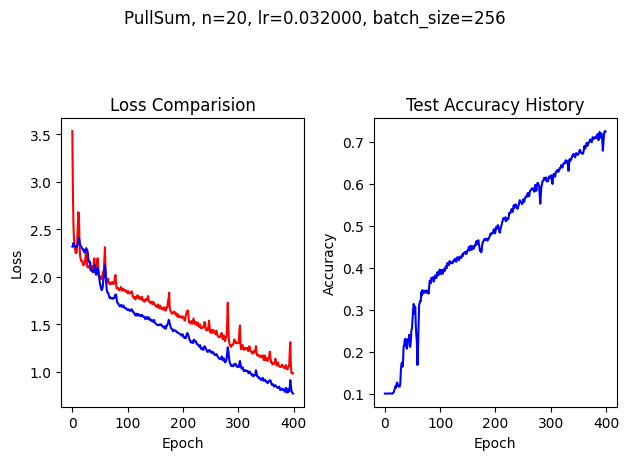

In [5]:
lr = 8e-4 * M
beta = 0.1
epochs = 400
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/数值实验_multi_gossip/Ring1, n={n}, lr={lr}, M={M}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)

In [6]:
n = 20
M = 10



I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
from network_func import di_ring
A,C=di_ring(n=20)
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A_M)
t = np.diag(1/result)
A=A_M
B=A_M@t


batch_size = 128*M

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root, seed=42
)

optimizer初始化成功!


Training Progress: 100%|██████████| 400/400 [1:00:34<00:00,  9.09s/it, epoch=400, test_accuracy=24.5900000000%, test_loss=1.9653070807, train_loss=2.0740931451]


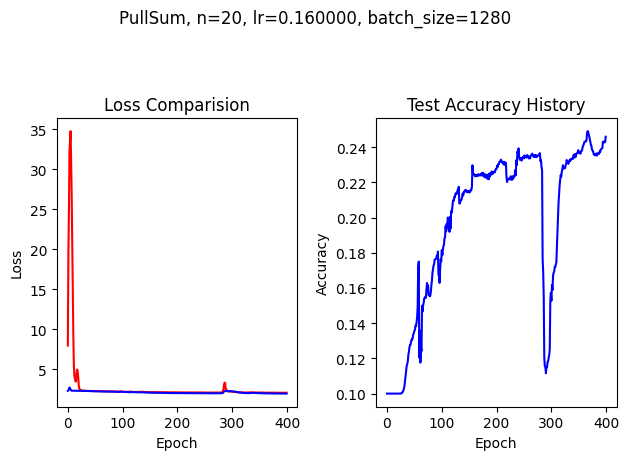

In [7]:
lr = 8e-4 * M
beta = 0.1
epochs = 400
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/数值实验_multi_gossip/Ring1, n={n}, lr={lr}, M={M}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.001, batch_size=128.csv"
)
df2 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.002, batch_size=128.csv"
)
df3 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.0006, batch_size=128.csv"
)
df4 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.0007, batch_size=128.csv"
)
df5 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.0008, batch_size=128.csv"
)
df6 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_均匀数据/数值实验结果_pullsum/Ring1, n=20, lr=0.0009, batch_size=128.csv"
)

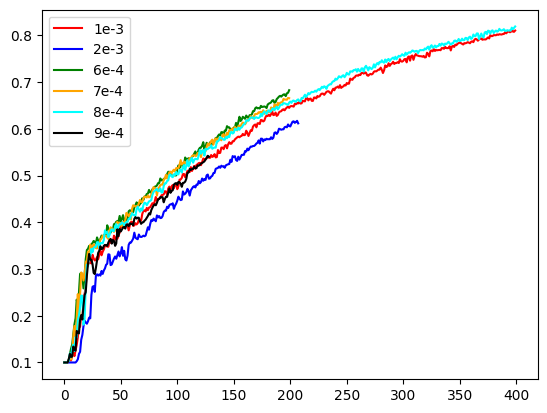

In [55]:
plt.plot(df1["Test_Accuracy"], color="r", label="1e-3")
plt.plot(df2["Test_Accuracy"], color="b", label="2e-3")
plt.plot(df3["Test_Accuracy"], color="g", label="6e-4")
plt.plot(df4["Test_Accuracy"], color="orange", label="7e-4")
plt.plot(df5["Test_Accuracy"], color="cyan", label="8e-4")
plt.plot(df6["Test_Accuracy"], color="black", label="9e-4")
plt.legend()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/异质性比例=0.8, Ring4, n=20, lr=0.001, batch_size=128.csv"
)
df2 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/异质性比例=0.8, Ring4, n=20, lr=0.0008, batch_size=128.csv"
)
df3 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/异质性比例=0.8, Ring4, n=20, lr=0.0015, batch_size=128.csv"
)
df4 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/new异质性比例=0.8, Ring4, n=20, lr=0.0006, batch_size=128.csv"
)
df5 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/异质性比例=0.8, Ring4, n=20, lr=0.002, batch_size=128.csv"
)

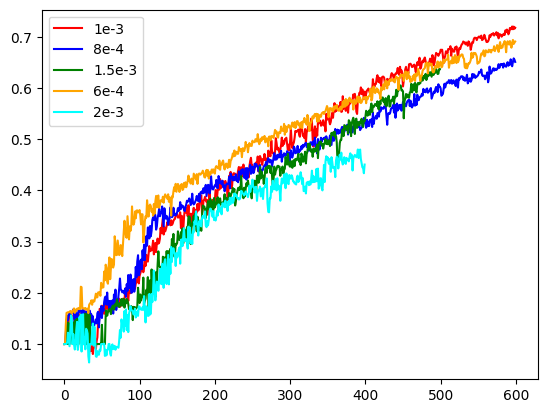

In [32]:
plt.plot(df1["Test_Accuracy"],color='r',label='1e-3')
plt.plot(df2["Test_Accuracy"],color='b',label='8e-4')
plt.plot(df3["Test_Accuracy"],color='g',label='1.5e-3')
plt.plot(df4["Test_Accuracy"],color='orange',label='6e-4')
plt.plot(df5["Test_Accuracy"],color='cyan',label='2e-3')
plt.legend()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.001, batch_size=128.csv"
)
df2 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.002, batch_size=128.csv"
)
df3 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.0008, batch_size=128.csv"
)
df4 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.0015, batch_size=128.csv"
)
df5 = pd.read_csv(
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.0006, batch_size=128.csv"
)

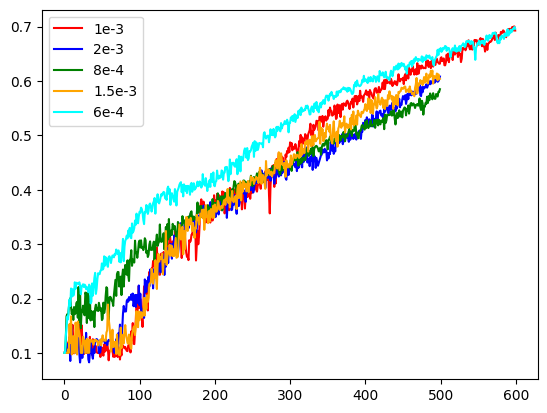

In [8]:
plt.plot(df1["Test_Accuracy"],color='r',label='1e-3')
plt.plot(df2["Test_Accuracy"],color='b',label='2e-3')
plt.plot(df3["Test_Accuracy"],color='g',label='8e-4')
plt.plot(df4["Test_Accuracy"],color='orange',label='1.5e-3')
plt.plot(df5["Test_Accuracy"],color='cyan',label='6e-4')
plt.legend()
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pullsum/异质性比例=0.8, Ring4, n=20, lr=0.0006, batch_size=128.csv")
df2=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验_大异质性数据/pulldiag/异质性比例=0.8, Ring4, n=20, lr=0.0015, batch_size=128.csv")

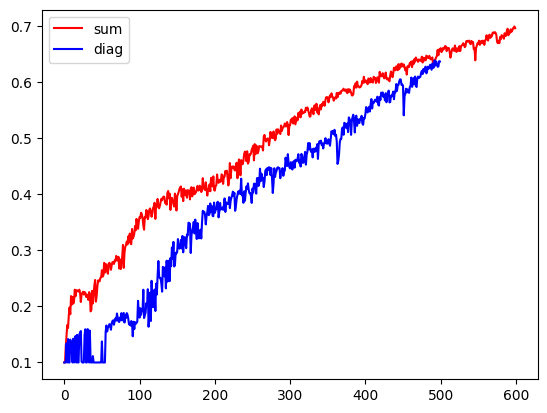

In [26]:
plt.plot(df1["Test_Accuracy"],color='r',label='sum')
plt.plot(df2["Test_Accuracy"],color='b',label='diag')
plt.legend()
plt.show()